Submission Deadline: __September 22, 2023; 11:59 PM__

A penalty will be applied for late submission. Please refer to the course policy for more detail.  

## Instructions

Please read the instructions carefully before you start working on the homework.

- Please follow instructions and printed out the results as required. Keep the printed results and your implementation for grading purpose.
    - The TAs will not run your code for grading purpose unless it is necessary. That means, you may lose some points if the printed results are not in the submitted file.
- Submission should be via Canvas.
    - If you use Google Colab for running the code, please download the file and submit it via Canvas once it's done.
    - Submission via a Google Colab link will be considered as an invalid submission.
- Please double check the submitted file once you upload it to Canvas.
    - Students should be responsible for checking whether they submit the right files.
    - Re-submission is not allowed once the deadline is passed.

Also, if you missed the class lectures, please study the course materials first before working on the homework. It may save you some time.

In [1]:
!pip install portalocker

Defaulting to user installation because normal site-packages is not writeable
  Using cached portalocker-2.8.2-py3-none-any.whl (17 kB)


# Task: Paraphrase Detection

Paraphrase detection is a text classification task, where the input is a pair of texts ($x_1, x_2$), and the output is the label $y$ of whether these two sentences are paraphrases ($y=1$) or not ($y=0$).

For example, given the following two sentences

- $x_1$: _The DVD-CCA then appealed to the state Supreme Court._
- $x_2$: _The DVD CCA appealed that decision to the U.S. Supreme Court._

the label $y$ should be $1$, as these two sentence are paraphrases.

In this homework, we will use paraphrase detection as an example task of text classification, and build both logistic regression and neural network classifiers for this task.


In this homework, we will use the Microsoft Research Paraphrase Corpus (MRPC) as the dataset for paraphrase detection. This is a dataset released

# 1 Logistic Regression (4 points)

You can refer to the demo code that we used in our class lecture as an example for your implementation. Please pay attention to the difference of the data format and the specific requirements, to make sure your implementation is correct.


Although there are different ways to download the MRPC dataset, we will use the one from `torchtext` to keep the consistency with the next section.

In [1]:
from torchtext.datasets import MRPC
from torchtext.data.functional import to_map_style_dataset

trn_iter = MRPC(split='train')
dev_iter = MRPC(split='test')

# Convert iterable-style dataset to map-style dataset
def collect_examples(dat_iter):
    label_list, text_list = [], []
    for label, text1, text2 in dat_iter:
        label_list.append(label)
        text_list.append(f"{text1} {text2}")
    return label_list, text_list

trn_labels, trn_texts = collect_examples(trn_iter)
dev_labels, dev_texts = collect_examples(dev_iter)

In [2]:
print(len(trn_labels),len(trn_texts))
print(len(dev_labels),len(dev_texts))
print(trn_texts[2])
print(trn_labels[2])

4076 4076
1725 1725
They had published an advertisement on the Internet on June 10 , offering the cargo for sale , he added . On June 10 , the ship 's owners had published an advertisement on the Internet , offering the explosives for sale .
1


## 1.2 Data Processing (2 points)

**TODO**: use the following code block to implement the steps for data processing. You can use the functions from [Sklearn](https://scikit-learn.org/stable/).

- Create the vocab by
    - filtering out the tokens with their frequencies less than 3
    - converting all words to lower cases
- Convert both `trn_texts` and `dev_texts` to data matrices using the constructed vocab
- Report
    - the number of words in the vocab
    - the dimensions of the two data metrices constructed in the previous steps

Please keep the reported the numbers in the file for grading purpose, and add necessary description of the printed results, so we can tell which one is which.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# ========================================
# TODO:

vectorizer = CountVectorizer(lowercase=True, min_df=3, binary=True,  ngram_range=(1,1))
trn_data = vectorizer.fit_transform(trn_texts)
dev_data = vectorizer.transform(dev_texts)



In [4]:
vocab = vectorizer.vocabulary_
print("Vocab size = {}".format(len(vocab)))
print("Size of training data = {}".format(trn_data.shape))
print("Size of val data = {}".format(dev_data.shape))


Vocab size = 4542
Size of training data = (4076, 4542)
Size of val data = (1725, 4542)


## 1.3 Logistic Regression Classifier

### 1.3.1 LR without regularization (1 point)

**TODO**: Please implement a logistic regression classifier for the paraphrase detection task. You can use the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier from Sklearn.


Please implement the logistic regression classifier with the following requirements

- include the bias term in the classifier
- turn off the regularization term (approximately)
- use the `liblinear` optimization algorithm (we don't talk about the detail of this algorithm in class, but it converges better when training with the MRPC dataset)

Please report

- the classification accuracies on both training and validation sets

In [51]:
from sklearn.linear_model import LogisticRegression

# =============================
# TODO:
# define a LR classifier

classifier = LogisticRegression(fit_intercept=True, penalty="l2", C=1000000.0,solver='liblinear', max_iter=1000, verbose=2)

In [52]:
classifier.fit(trn_data, trn_labels)

print(f"Class = {classifier.classes_}")

print(f"Size of w: {classifier.coef_.size}")
print(f"w = {classifier.coef_}")
print(f"b = {classifier.intercept_}")

# Measure the performance on training and dev data
print(f"Training accuracy = {classifier.score(trn_data, trn_labels)*100}%")
print(f"Val accuracy = {classifier.score(dev_data, dev_labels)*100}%")

[LibLinear]iter  1 act 1.035e+09 pre 9.138e+08 delta 1.041e+01 f 2.825e+09 |g| 1.319e+09 CG   5
cg reaches trust region boundary
iter  2 act 4.301e+08 pre 4.010e+08 delta 1.276e+01 f 1.791e+09 |g| 2.854e+08 CG   5
cg reaches trust region boundary
iter  3 act 3.649e+08 pre 3.104e+08 delta 1.574e+01 f 1.361e+09 |g| 1.392e+08 CG   7
cg reaches trust region boundary
iter  4 act 2.852e+08 pre 2.651e+08 delta 1.771e+01 f 9.956e+08 |g| 1.086e+08 CG   8
cg reaches trust region boundary
iter  5 act 2.494e+08 pre 2.230e+08 delta 2.237e+01 f 7.104e+08 |g| 8.298e+07 CG   9
cg reaches trust region boundary
iter  6 act 1.748e+08 pre 1.515e+08 delta 2.675e+01 f 4.610e+08 |g| 4.496e+07 CG  11
cg reaches trust region boundary
iter  7 act 8.821e+07 pre 1.216e+08 delta 2.118e+01 f 2.862e+08 |g| 2.493e+07 CG  14
cg reaches trust region boundary
iter  8 act -5.459e+07 pre 1.055e+08 delta 8.296e+00 f 1.980e+08 |g| 1.622e+07 CG   8
cg reaches trust region boundary
iter  8 act 4.297e+07 pre 4.762e+07 delta 8.

### 1.3.2 LR with regularization (1 point)

**TODO**: Please implement the LR classifier with the following requirements

- include the bias term in the classifier
- include the $\ell_2$ regularization with $\lambda = 10.0$
- use the `liblinear` solver

Please report

- the classification accuracies on both training and validation sets

In [53]:
from sklearn.linear_model import LogisticRegression

# =============================
# TODO:
classifier = LogisticRegression(fit_intercept=True, penalty="l2", C=0.1,solver='liblinear', max_iter=1000, verbose=2)

In [54]:
classifier.fit(trn_data, trn_labels)

print(f"Class = {classifier.classes_}")

print(f"Size of w: {classifier.coef_.size}")
print(f"w = {classifier.coef_}")
print(f"b = {classifier.intercept_}")

# Measure the performance on training and dev data
print(f"Training accuracy = {classifier.score(trn_data, trn_labels)*100}%")
print(f"Val accuracy = {classifier.score(dev_data, dev_labels)*100}%")

[LibLinear]iter  1 act 6.752e+01 pre 6.321e+01 delta 4.680e+00 f 2.825e+02 |g| 1.319e+02 CG   4
iter  2 act 8.758e+00 pre 8.615e+00 delta 4.680e+00 f 2.150e+02 |g| 1.768e+01 CG   6
iter  3 act 1.731e-01 pre 1.729e-01 delta 4.680e+00 f 2.062e+02 |g| 2.454e+00 CG   7
iter  4 act 2.375e-03 pre 2.374e-03 delta 4.680e+00 f 2.061e+02 |g| 1.634e-01 CG   8
iter  5 act 2.085e-05 pre 2.085e-05 delta 4.680e+00 f 2.061e+02 |g| 1.442e-02 CG   9
Class = [0 1]
Size of w: 4542
w = [[-0.086767   -0.20826773 -0.13904984 ... -0.09059056  0.06460541
   0.08833033]]
b = [0.77844729]
Training accuracy = 80.0785083415113%
Val accuracy = 68.34782608695652%


# 2 Neural Classifiers (11 points)

The following code was adopted from the [demo code]() that we used for our class lectures. Please read the instructions carefully (especially, the **TODO** part in each section), to make sure your implementation is correct.

## 2.1 Data

### 2.1.1 Load Data (2 points)

In [55]:
# Necessary packages

import sys, os, random, math, sys
import torch, spacy
import numpy as np
from torch import nn
from tqdm.notebook import trange, tqdm

from matplotlib import pyplot as plt

from torch import optim
from torch.autograd import Variable
from torch.nn.utils import clip_grad_norm_ as clip_grad_norm
from torch.nn import functional as F


## Random seeds, to make the results reproducible
seed = 32
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
print(torch.randn(2,5))

tensor([[ 0.8651,  0.0284,  0.5256, -0.3633, -0.4169],
        [-1.2650,  1.2367,  0.1980, -1.5811,  0.4532]])


Note that

- the `basic_english` tokenizer called by the `get_tokenizer` function will first normalize the text then tokenize it using white spaces. This is definitely not the optimal tokenizer, and you can find other options [here](https://pytorch.org/text/stable/data_utils.html#torchtext.data.utils.get_tokenizer). For this homework, we will use this simple tokenizer.

**TODO**

- Load the dataset `MRPC`
- Construct the `vocab` based on the training set with the following requirements
    - Filter out the tokens with the frequency less than 3
    - Add two special tokens: `<unk>` and `<pad>`
    - Set the default word index as the index of the `<unk>` token

Please report
- Print out the size of the `vocab`

Keep the reported results for grading.

In [56]:
from torchtext.datasets import MRPC
from torchtext.utils import download_from_url
from torchtext.data.utils import get_tokenizer, ngrams_iterator
from torchtext.vocab import build_vocab_from_iterator

ngrams = 1

tokenizer = get_tokenizer("basic_english")

vocab = None

### I am still confused about it
def yield_tokens(data_iter, ngrams):
    """ An iterator that return tokens of a text every time it is called
    """

    for _,text1,text2 in data_iter:
        text3 = " ".join([text1, text2])

        yield ngrams_iterator(tokenizer(text3), ngrams)

trn_iter = MRPC(split='train')

# create a vocab, and add two special tokens
vocab = build_vocab_from_iterator(yield_tokens(trn_iter, ngrams), min_freq=3, specials=["<unk>","<pad>"])
# by default, if a word is not in the vocab, use <unk> token instead
vocab.set_default_index(vocab["<unk>"])

# =============================
# TODO:

print(f"Number of words in the vocab: {len(vocab)}")
print(f"The index of 'i love coffee': {vocab(['i', 'love', 'coffee'])}")
print(f"The index of '<unk>': {vocab['<unk>']}")
print(f"The index of 'I': {vocab['I']}")

Number of words in the vocab: 6229
The index of 'i love coffee': [59, 2603, 4254]
The index of '<unk>': 0
The index of 'I': 0



### 2.1.2 Data Preprocessing Functions (2 points)

The following code block does two things

- create mini-batches
- convert texts into numeric vectors (tensors)

**TODO**

- For each mini batch, set its own cutoff length
    - By default, set the cutoff length to be the longest text in that minibatch
    - If the length is larger than 50, set it to be 50

In [57]:
cutoff_threshold = 50

def text_pipeline(x):
    """ Read the tokens from text x and return the list of word indices
    """
    return vocab(list(ngrams_iterator(tokenizer(x), ngrams)))

def collate_batch(batch):
    """ Construct the text/label tensors based on a mini-batch of texts and their labels
    """
    #label_tensor, text_tensor = None, None
    # =============================
    # TODO:

    """ Construct the text/label tensors based on a mini-batch of texts and their labels
    """
    length = 50 # cutoff length: 50
    label_list, text_list = [], []
    for ( _label,_text1,_text2) in batch:
        #print("am I here?")
        label_list.append(_label)
        _text3=" ".join([_text2,_text1])
        processed_text = text_pipeline(f"{_text1} {_text2}")
        if len(processed_text) < length:
            # Sentence shorter than the pre-defined length
            processed_text += [vocab["<pad>"]]*(length-len(processed_text))
        elif len(processed_text) > length:
            # Sentence longer than the pre-defined length
            processed_text = processed_text[:length]
        text_list.append(torch.tensor(processed_text))
    label_tensor = torch.tensor(label_list, dtype=torch.int64)
    # Stack a list of one-dimensional tensors together to form a 2-dimensional tensor
    text_tensor = torch.stack(tuple(text_list))
    # This step is not essential, only for personal preference
    text_tensor = torch.transpose(text_tensor, 0, 1)
    #print(label_tensor)
    return label_tensor, text_tensor



### 2.1.3 Data Processing (1 point)


Call the functions defined in the previous code block to process both the `training` and `dev` sets

**TODO**

- Load the training and test sets
- Construct mini-batches for training and evaluation with mini-batch size as 32

In [58]:
from torchtext.data.functional import to_map_style_dataset
from torch.utils.data import DataLoader

# Mini-batch size
batch_size = 32

# Read the data again
trn_iter = MRPC(split='train')
dev_iter = MRPC(split='test')

#trn_dataloader, dev_dataloader = None, None

# =============================
# TODO:
# Convert iterable-style dataset to map-style dataset
trn_dataset = to_map_style_dataset(trn_iter)
dev_dataset = to_map_style_dataset(dev_iter)


# Use the DataLoader from PyTorch to create mini-batch sets
trn_dataloader = DataLoader(trn_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch) #false silo



dev_dataloader = DataLoader(dev_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)


## 2.2 A Simple Feed-forward Neural Network Classifier

The goal of this section is to demonstrate

- how to define a simple neural text classifier
- how to train the neural network model with the BP algorithm

### 2.2.1 Define Neural Network Models (2 points)

This section defines a basic neural network model (as illustrated in the following figure) for text classification.

**TODO**

Please follow the specification to implement the neural network model. Compared to the single layer neural network model, the following neural network will add another hidden layer, which is a fully-connected neural network.

1. From input layer to the first hidden layer: for a given text $x$

$$h^{(1)} = \sigma (x_1 + x_2 + \cdots + x_N)$$

where $\{w_1, x_2, \cdots, w_N\}$ is the corresponding word embeddings in the text $x$. This is a mathematical formulation. In the actual implementation, it also involves adding the embeddings of some padding tokens.

2. From the first hidden layer to the second hidden layer

$$h^{(2)} = \sigma (W^{(2)}\cdot h^{(1)})$$

where $W^{(2)}$ is the learnable parameter for the second layer.

3. From the second hidden layer to the classification layer

$$p(y) =\text{Softmax}(W^{(o)} h^{(2)}) $$

where $W^{(o)}$ is the learnable parameter for the classification layer.

In [59]:
class NeuralClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, class_size=2):
        super(NeuralClassifier, self).__init__()
        """ Initialization
        - vocab_size
        - embed_size: word embedding size
        - drop_rate: dropout rate
        - class_size: number of classes. For binary classification, class_size = 2
        """
        # ---------------------------------
        # Configuration
        self.vocab_size = vocab_size # size of the vocab
        self.class_size = class_size # number of classes
        self.hidden_size=hidden_size

        # ==================================
        # TODO:
        # Network parameters
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.fc_hidden = nn.Linear(embed_size, hidden_size,bias=True)#bias=True
        self.fc = nn.Linear(hidden_size, class_size,bias=True) #bias=True



        # END of TODO
        # ==================================


    def forward(self, batch):
        """ Forward function
        """
        label, text = batch

        # =================================
        # TODO:

        # ---------------------------------
        # === Hidden layer ===
        # Sum over all the embeddings for each input text
        #   then, pass through the nonlinear Sigmoid function
        x = self.embed(text) # Dim: L x B x E
        #print(x.shape)
        # print(x.size())
        hidden = torch.sigmoid(x.sum(axis=0)) # Dim: B x E
        #print(hidden.shape)

        # ---------------------------------
        # === Classification layer ===
        #logit = self.fc(hidden) # Dim: Batch_size x Class_size

        # Apply hidden layer and activation function (e.g., sigmoid)
        x = torch.sigmoid(self.fc_hidden(hidden))  # Dim: B x hidden_size

        # ---------------------------------
        # === Classification layer ===
        logit = self.fc(x)  # Dim: Batch_size x Class_size
        # Normalization
        logprob = F.log_softmax(logit, dim=1)

        # ---------------------------------
        # === Loss function ===
        # Compute negative log-likelihood loss


        # END of TODO
        # ==================================
        loss = F.cross_entropy(logprob, label)
        return loss, logprob


## 2.3 Neural Network Training

### 2.3.1 Additional functions for mini-batch training and evaluation

Define the training function with a mini-batch


In [60]:
def batch_train(batch, model, optimizer):
    """ Training with one batch
    - batch: a min-batch of the data
    - model: the defined neural network
    - optimizer: optimization method used to update the parameters
    """
    # set in training mode
    #print(batch[0].shape,batch[1].shape)
    model.train()
    # initialize optimizer
    optimizer.zero_grad()
    # forward: prediction
    loss, _ = model(batch)
    # backward: gradient computation
    loss.backward()
    # norm clipping, in case the gradient norm is too large
    clip_grad_norm(model.parameters(), 1.0)
    # gradient-based update parameter
    optimizer.step()
    return model, loss.item()

Define the evaluation function

In [61]:
def eval(data_iter, model):
    """ Evaluate the model with the data
    data_iter: the data iterator
    model: the defined model
    """
    # set in the eval model, which will trun off the features only used for training, such as droput
    model.eval()
    # records
    val_loss, val_batch = 0, 0
    total_example, correct_pred = 0, 0
    # iterate all the mini batches for evaluation
    for b, batch in enumerate(data_iter):
        # Forward: prediction
        label, _ = batch
        loss, logprob = model(batch)
        #
        val_batch += 1
        val_loss += loss
        # Argmax
        max_logprob, pred_label = torch.max(logprob, -1)
        correct_pred += (pred_label==label).sum()
        total_example += label.size()[0]
    acc = (1.0*correct_pred)/total_example
    return (val_loss/val_batch).item(), acc

### 2.3.2 Main function for training (2 points)

**TODO**

In the following code, please implement the main function for training and validation with the requirements

- Size of the neural network classifier
    - embedding size: 16
    - hidden size: 32
- Optimizer
    - use the SGD optimizer
    - learning rate: 0.05
    - weight decay coefficient: 0.0
- Training epochs: 60
- Validation:
    - Run validation after every 100 steps
    - Record the validation loss `ValLoss` and validation accuracy `ValAcc`
    - Record the average training loss `TrnLoss` across all the training steps so far


Please report

- the best prediction accuracy on the validation set
- the prediction accuracy with the model at the end of the training.  **(Not done yet)**


Please keep the reported numbers for grading purpose.

Note that, the best prediction accuracy should be higher than 68%

In [91]:
# -----------------------------------
vocab_size = len(vocab)
#print(vocab_size)
torch.manual_seed(seed)
TrnLoss, ValLoss, ValAcc = [], [], []


# 2. Define the model and optimizer
model = NeuralClassifier(vocab_size, embed_size=16,hidden_size=32, class_size=2)
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.05, weight_decay=0)
# the norm of grad clipping
grad_clip = 1.0
# 3. Define the numbers of training epochs and validation steps
epoch, val_step = 60, 100

# ------------------------------------
# 4. Training iterations
TrnLoss, ValLoss, ValAcc = [], [], []
total_batch = 0
total_loss = 0.0
for e in range(epoch):
    # print(e)
    for b, batch in enumerate(trn_dataloader):
        total_batch += 1
        # Update parameters with one batch
        model, loss = batch_train(batch, model, optimizer)
        total_loss += loss
        # Compute validation loss after each val_step
        if total_batch % val_step == 0:
            val_loss, val_acc = eval(dev_dataloader, model)
            ValLoss.append(val_loss)
            ValAcc.append(val_acc)
            TrnLoss.append(total_loss/total_batch)
print(f"The best validation accuracy = {(max(ValAcc)*100)}%")

final_loss,final_acc=eval(dev_dataloader,model)
print(f"The final prediction accuracy = {final_acc*100}%")




The best validation accuracy = 68.34782409667969%
The final prediction accuracy = 67.59420013427734%


### 2.3.3 Training analysis (2 points)

Run the following code block to visualize the training and validation losses. Based on the loss curves, answer the following question.

- Is the model sufficient trained?
- What is the your evidence to the first question?

Please use the text block under the figure to fill in your answer

**TODO**:

Yes this model is sufficiently trained.

Both Training loss and validation loss decreases with steps. Initially validation loss was greater than the corresponding training loss, however, after 20 steps it learns and started to show less loss than training loss. Although we can see some spikes over the steps, the loss for validation is decreasing. I tried running it for 100 epochs, I found that with that epoch validation accuracy remains above 68% and loss remains approximately same. In that case we can say that this model is converging.  


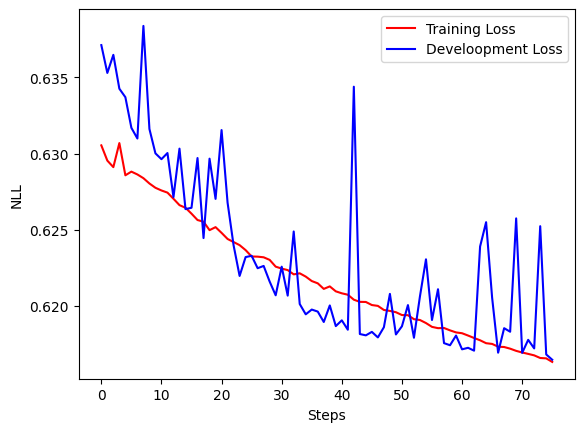

In [67]:
plt.plot(range(len(TrnLoss)), TrnLoss, color="red", label="Training Loss") # Training loss
plt.plot(range(len(ValLoss)), ValLoss, color="blue", label="Develoopment Loss") # Val loss
plt.xlabel("Steps")
plt.ylabel("NLL")
plt.legend()

#Todo
Yes this model is sufficiently learned.

Here the value of the both training and validation loss is decreasing over the steps. Initially, the loss for validation data was greater than training loss. However, after step 20 it gets smaller than training loss. Although at some point we can see some spikes in the validation loss, this curve is actually decreasing. In that sense we can say that the model is learning. Also I tried running with larger epoch size and found that after 60 epoch the best validation accuracy is above 68% and loss value remains the same. Since I can say that this model converges with steps. 

## 2.4 Further Improvement (2 points)

There are several hyper-parameters that we can tune to get better results. Here are five of them

- Number of epochs
- Learning rate
- Size of word embeddings
- Size of hidden dimensions
- Weight decay

Based on your implementation in section 2.2.2, feel free to modify any hyper-parameters and try to get a better prediction accuracy on the validation set. The result should be at least 0.5% better than the best prediction accuracy on the validation set reported in section 2.2.2.

Please report

- the best prediction accuracy on the validation set and
- the specific values of the hyper-parameters used to produce the best result

Keep the numbers in the file for grading.

In [90]:
# -----------------------------------
vocab_size = len(vocab)

torch.manual_seed(seed)
TrnLoss, ValLoss, ValAcc = [], [], []

hidden_size=32
weight_decay=0
# 2. Define the model and optimizer
model = NeuralClassifier(vocab_size, embed_size=32,hidden_size=32, class_size=2)
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.05, weight_decay=0)
# the norm of grad clipping
grad_clip = 1.0
# 3. Define the numbers of training epochs and validation steps
epoch, val_step = 100, 100

# ------------------------------------
# 4. Training iterations
TrnLoss, ValLoss, ValAcc = [], [], []
total_batch = 0
total_loss = 0.0
for e in range(epoch):
    # print(e)
    for b, batch in enumerate(trn_dataloader):
        total_batch += 1
        # Update parameters with one batch
        model, loss = batch_train(batch, model, optimizer)
        total_loss += loss
        # Compute validation loss after each val_step
        if total_batch % val_step == 0:
            val_loss, val_acc = eval(dev_dataloader, model)
            ValLoss.append(val_loss)
            ValAcc.append(val_acc)
            TrnLoss.append(total_loss/total_batch)
print(f"The best validation accuracy = {(max(ValAcc)*100)}%")

print(f"epoch= {epoch}, hidden_size= {hidden_size}, embed_size={embed_size}, lr={lr},weight decay={weight_decay}")
# for epoch 100 got 68.46%
# for epoch 100, embed =32 68.93

The best validation accuracy = 68.92753601074219%
epoch= 100, hidden_size= 32, embed_size=16, lr=0.05,weight decay=0


**End of the homework 01**

---